

# ArviZ Stancon 2020

We're gonna talk about some real cool stuff.

If you are reading the interactive slides from binder, press `space` to move to the next slide.

# ArviZ and InferenceData


## Agenda
* The many steps of Bayesian Workflow
* Where ArviZ fits in
* Where InferenceData fits in
* Where the community fits
* What doesn't quite fit in (yet)
* Where you fit in

# The international ArviZ community
Like the greater Bayesian community, ArviZ contributors herald from many places. This presentation is available in the many languages of our contributors. Be sure to check them out!

| Language      | Video         | Slides |
| ------------- |:-------------:| ------:|
| English      | - |  [![badge](https://img.shields.io/badge/launch-English%20slides-579ACA.svg?logo=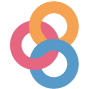)](https://mybinder.org/v2/gh/arviz-devs/arviz_sandbox/master?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Farviz-devs%252Farviz_misc%26urlpath%3Dtree%252Farviz_misc%252Fstancon_2020%252FInferenceData_Stancon2020_en.ipynb%26branch%3Dmaster) |
| Català      | - | [![badge](https://img.shields.io/badge/iniciar-presentaci%C3%B3%20en%20catal%C3%A0-579ACA.svg?logo=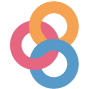)](https://mybinder.org/v2/gh/arviz-devs/arviz_sandbox/master?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Farviz-devs%252Farviz_misc%26urlpath%3Dtree%252Farviz_misc%252Fstancon_2020%252FInferenceData_Stancon2020_cat.ipynb%26branch%3Dmaster) |
| Français | -      | [![badge](https://img.shields.io/badge/lancer-pr%C3%A9sentation%20fran%C3%A7aise-579ACA.svg?logo=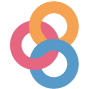)](https://mybinder.org/v2/gh/arviz-devs/arviz_sandbox/master?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Farviz-devs%252Farviz_misc%26urlpath%3Dtree%252Farviz_misc%252Fstancon_2020%252FInferenceData_Stancon2020_fr.ipynb%26branch%3Dmaster) |
| suomi | -      | [![badge](https://img.shields.io/badge/k%C3%A4ynnist%C3%A4-esitys%20suomeksi-579ACA.svg?logo=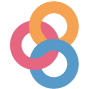)](https://mybinder.org/v2/gh/arviz-devs/arviz_sandbox/master?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Farviz-devs%252Farviz_misc%26urlpath%3Dtree%252Farviz_misc%252Fstancon_2020%252FInferenceData_Stancon2020_fi.ipynb%26branch%3Dmaster) |
| हिन्दी (Hindi) | -      |    - |


# Bayesian Workflow
There are many steps and PPLs only help out with some of them. ArviZ aims to help with the others.

![Bayesian Workflow](img/Bayesian_workflow_Updated.png)

# All MCMC chains lead to plot_rank 
PPL choice may depend on syntax or sampler but chains, draws/samples, diagnostics, visualizations and modeling intent are largely the same

![PPLs](img/PPLS.png)

# So many arrays
* Prior Predictive
* Posterior
* Divergences
* Log probabilities for diagnostics
* All the above per parameter + different shapes in hierachical models

Dataframes with integrated indexing proved valuable for analysis. Bayesian data is high dimensional and shares many of the challenges. 



# InferenceData is one path
* Full specification https://arviz-devs.github.io/arviz/schema/schema.html
* Each NetCDF group stores a different quantity

![idata](https://arviz-devs.github.io/arviz/_images/InferenceDataStructure.png)


# InferenceData sneak peek
* Read local netCDF files
* Generate `InferenceData` from a PyStan fit

Also integrated from Python with [CmdStanPy](https://arviz-devs.github.io/arviz/notebooks/InferenceDataCookbook.html#From-CmdStanPy), [CmdStan](https://arviz-devs.github.io/arviz/notebooks/InferenceDataCookbook.html#From-CmdStan) and from Julia with [CmdStan.jl](https://arviz-devs.github.io/ArviZ.jl/stable/quickstart.html#Plotting-with-CmdStan.jl-outputs-1)

## Read local netCDF files

In [1]:
import arviz as az

# Loading a precomputed .nc file from internet.
# az.from_netcdf("radon.nc") for local netcdf
idata = az.load_arviz_data("radon")
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

In [2]:
az.style.use("arviz-darkgrid")
az.rcParams["stats.ic_pointwise"] = True

## Generate InferenceData from a PyStan fit


In [3]:
# Inference Data already compatible with Stan Interfaces (Thanks Ari, Allen and Mitzi!)
import pystan
from scipy import stats
y = stats.norm(10, 1).rvs(1000)
model = """
data {int N; real y[N];} parameters {real mu; real<lower=0> sigma;}
model { mu ~ normal(0, 1); sigma ~ cauchy(0, 1); y ~ normal(mu, sigma);}
"""
stan_model = pystan.StanModel(model_code=model, extra_compile_args=['-flto'])
fit = stan_model.sampling(data={"y":y, 'N':len(y)})

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7068b6fd3880b0f3a68d15c5c43d21aa NOW.


In [4]:
idata_pystan = az.from_pystan(
    posterior=fit,
    observed_data=["y"],
)
idata_pystan

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

# Organized data makes complex calculation easy

## Posterior exploration and diagnosis

<table style="color:#bbb">
  <tr>
    <th><span style="color:#000">posterior</span></th>
    <th><span style="color:#000">sample stats</span></th>
    <th>log likelihood</th>
    <th>posterior predictive</th>
    <th>observed data</th>
    <th>prior</th>
    <th>prior predictive</th>
  </tr>
</table>

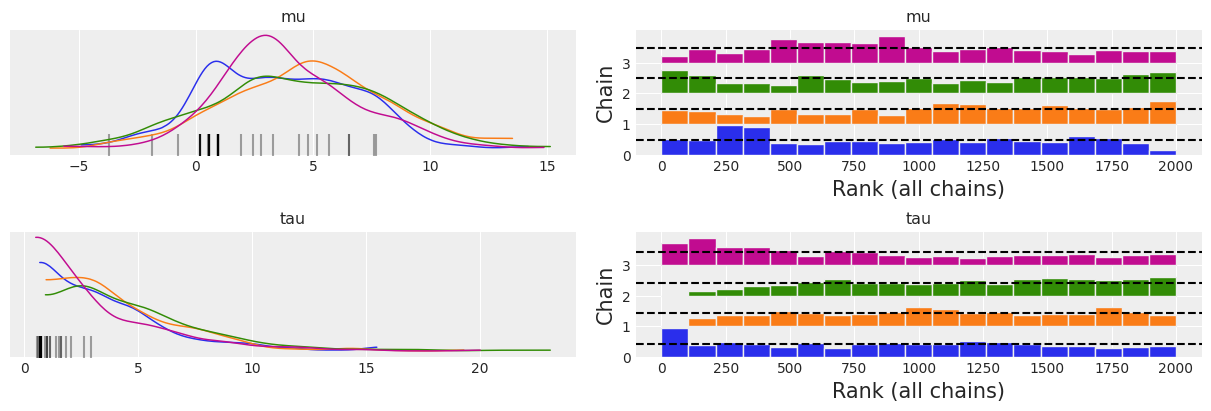

In [5]:
az.plot_trace(az.load_arviz_data("centered_eight"), var_names=["mu", "tau"], kind="rank_bars");

## Leave one out cross-validation (PSIS)

<table style="color:#bbb">
  <tr>
    <th>posterior</th>
    <th>sample stats</th>
    <th><span style="color:#000">log likelihood</span></th>
    <th>posterior predictive</th>
    <th>observed data</th>
    <th>prior</th>
    <th>prior predictive</th>
  </tr>
</table>

In [6]:
az.loo(idata)

Computed from 2000 by 919 log-likelihood matrix

         Estimate       SE
elpd_loo -1027.14    28.85
p_loo       26.78        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      919  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%


The scale is now log by default. Use 'scale' argument or 'stats.ic_scale' rcParam if
you rely on a specific value.
A higher log-score (or a lower deviance) indicates a model with better predictive
accuracy.

## Prior predictive checks

<table style="color:#bbb">
  <tr>
    <th>posterior</th>
    <th>sample stats</th>
    <th>log likelihood</th>
    <th>posterior predictive</th>
    <th><span style="color:#000">observed data</span></th>
    <th>prior</th>
    <th><span style="color:#000">prior predictive</span></th>
  </tr>
</table>

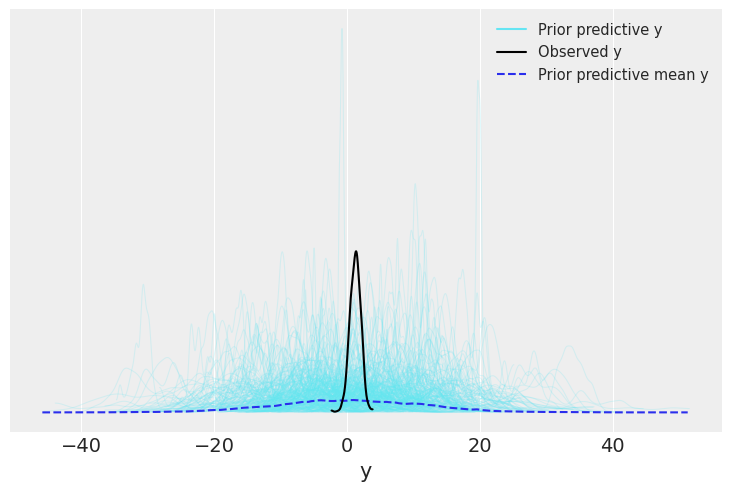

In [7]:
az.plot_ppc(idata, group="prior");

## Leave one out probability integral transform 

<table style="color:#bbb">
  <tr>
    <th>posterior</th>
    <th>sample stats</th>
    <th><span style="color:#000">log likelihood</span></th>
    <th><span style="color:#000">posterior predictive</span></th>
    <th><span style="color:#000">observed data</span></th>
    <th>prior</th>
    <th>prior predictive</th>
  </tr>
</table>

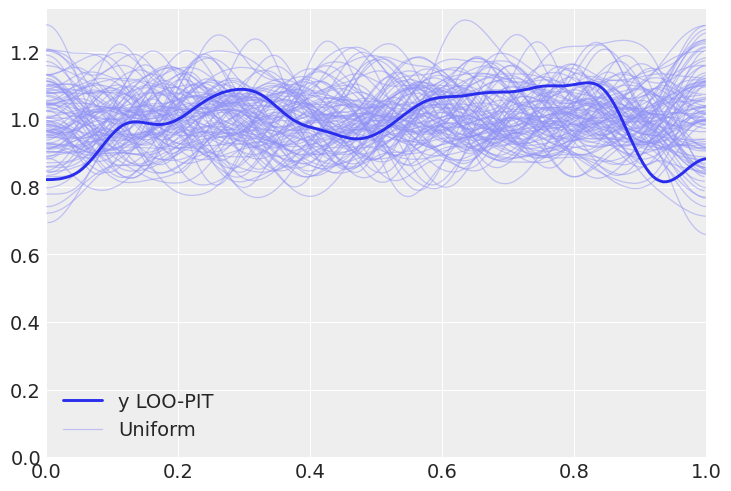

In [8]:
az.plot_loo_pit(idata, y="y");

# ArviZ and InferenceData benefits
* Consistent data representation across languages and PPLs
* Portable and persistent netCDF format
* Shareable datasets encourage reproducibility
* Allows PPL designers to focus on PPL and not on out of sampler diagnostics and plots

# InferenceData Limitations
* InferenceData is MCMC specific
* Doesn't make full Bayesian workflow reproducible, just parts of it

# Add InferenceData support to your package
* InferenceData can just be format specification. 
* You don't need to use ArviZ or Python 

![](img/ArviZ.R.png)

# We could use your help!
* Polish the `InferenceData` [schema](https://arviz-devs.github.io/arviz/schema/schema.html)
* Additional plots and diagnostics
* Code, feedback, publicly sharing models, and cool plots you've made
* Improvements such as support for sparse data structures and others

## More information

* https://arviz-devs.github.io/arviz/
* https://arviz-devs.github.io/ArviZ.jl/stable/
* https://arviz-devs.github.io/arviz/notebooks/XarrayforArviZ.html
* https://arviz-devs.github.io/arviz/schema/schema.html